# Сборный проект: анализ игрового интернет-магазина

В данном проекте имеются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) интернет-магазина "Стримчик. В данной работе нужно выявить определяющие успешность игры закономерности для составление рекламной комнии путем увеличения внимания на популярном продукте.
Цель исследования:

1. Определение наиболее популярного продукта на 2017 год
2. Выявить факторы влияющие на популярность этого продукта

Ход исследования:

- Изучим общую информацию из следующего файла с данными '/datasets/games.csv'. Провести прдобработку данных, проработать пропуски и дубликаты в данных и пояснить они так обработаны, преобразовать данные в более подходящие типы, посчитайте суммарные продажи во всех регионах и записать их в отдельный столбец
- провести исследовательский анализ данных, сколько игр выпускалось в разные годы, как менялись продажи по платформам, какие платформы лидируют по продажам, общее распределение игр о жанрам не учитывая данные за предыдущие годы
- составим портрет пользователя каждого региона, составив топ-5 популярных платформ и топ-5 самых популярных жанров, а так же вляет ли возрастной рейтинг ESRB на продажи в отдельном регионе
- проверим гипотезы:

  -средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    
  -средние пользовательские рейтинги жанров Action  и Sports разные
    
Сформируем общий вывод по данной работе

## 1. Изучаем общую информацию

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data_total = pd.read_csv('/datasets/games.csv')
data_total.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2. Предобработчка данных

Произведем проверку на наличие явных и не явных дубликатов.

In [4]:
data_total.duplicated().sum()

0

Явные дубликаты не обнаруженны. 

In [5]:
dub_game = data_total[data_total.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])]
dub_game

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [6]:
data_total = data_total.drop(16230)
dub_game = data_total[data_total.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])]
dub_game

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.0,0.03,0.0,NaN,NaN,NaN


Явные дубликаты не были обнаруженны. Не явных дубликатов обнаруженно всего 2 пары по столбцам названия игры, платформы и год релиза - убираем одну строку чтобы убрать одно задублированное значение, а второе значение оставить, вторую пару дубликатов не будем убирать, так как их обработаем дальше в пропусках по столбцу name.

Приведем к нижнему регистру названия столбцов в датафрейме, сначала проверим в каком виде названия столбцов

In [7]:
data_total.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [8]:
data_total.columns = data_total.columns.str.lower()
data_total

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразуем данные в нужные типы

In [9]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
data_total['year_of_release'] = data_total['year_of_release'].astype('Int64')

В остальных столбах нельзя поменять тип значений там где это было бы уместно из-за пропусков.

In [11]:
data_total.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
data_total.dropna(subset=['name'], inplace=True)
data_total.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16709,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data_total.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [14]:
data_total.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Для столбца year_of_release попробуем заменить пропуски значениями своих предшествиников по названию.

In [15]:
data_total['year_of_release'] = data_total.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.iloc[0])).values
data_total.isna().sum()

name                  0
platform              0
year_of_release     191
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

В данном случае не получилось полностью заменить пропуски, имя игры повторяется не всегда.

In [16]:
data_total.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Вместо пропусков лучше поставить заглушку, так как связи в с другими столбиками нет, а удалять данные не рентабельно, так как потеряем большое колличество данных

In [17]:
data_total['critic_score'] = data_total['critic_score'].fillna(-999)
data_total.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999.0,NaN,NaN


In [18]:
data_total.isna().sum()

name                  0
platform              0
year_of_release     191
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

Так же поступим и с столбицов user_score, заменим пропуски заглушкой.

In [19]:
data_total['user_score'] = data_total['user_score'].fillna(-99)
data_total.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,-99,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-99,NaN


Замена заглушками пропуски в столбцах user_score и critic_score позволяет нам совершить более корректную работу в анализе данных вдальнейшем.

In [20]:
data_total.isna().sum()

name                  0
platform              0
year_of_release     191
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

В столбце user_score имеется значение "tbd" - это означает, что рейтинг еще не выставлен, так что на данный момент логичнее заменить его значением -1 для более корректной работы с столбцом.

Пропускам в данных категориях могли произойти по причине неправильной выгрузки данных, это относится к столбцам name и year_of_release. В столбцах с отзывами критиков, с отзвами пользователям может быть связанно с некорректной работой отзывов на сайте, так как большое колличесвто строк с отсутствием отзыв и в одном и в другом столбце.
По поводу столбца rating можно предположить , что в разных регионах принят разный возростной рейтинг.

In [21]:
data_total['user_score'] = data_total['user_score'].replace('tbd', -1)
data_total['user_score'] = data_total['user_score'].astype('float64')
data_total

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,-99.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-99.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-999.0,-99.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-999.0,-99.0,NaN


In [22]:
data_total.isna().sum()

name                  0
platform              0
year_of_release     191
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [23]:
data_total['rating'] = data_total['rating'].fillna('DN')
data_total.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,-99.0,DN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-99.0,DN


Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [24]:
data_total['total_sale'] = data_total['na_sales'] + data_total['eu_sales'] + data_total['jp_sales'] + data_total['other_sales']
data_total

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,-99.0,DN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-99.0,DN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-999.0,-99.0,DN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-999.0,-99.0,DN,0.01


# Вывод по разделу:
В данном разделе были обработаны дубликаты по трем столбцам (name, platform и year_of_release) так как одна и та же игра может выходить на разных платформах в разное время, а так же дата релиза может быть независимо разным (переиздание).
Были обработаны пропуски:
- в столбце name - избавились из-за малого колличества самих пропусков
- в столбце year_of_release часть пропусков была заменина на предшествующие даты релиза одной и той же категории по названию
- в столбцах critic_score, user_score, rating пропуски были заменены заглушкой (отрицательными значениями) для более корректной дальнейшей работы
- в столбце user_score значение 'tbd' было замененно заглушкой отрицательного значения так как его смысл это отсутствие отзыва
Так же была просчитанна сумма продаж со всех регионов и сведенно в отдельный столбец.

## Шаг 3. Исследовательский анализ данных

Просмотреть сколько игр выпустили в разные годы.

[Text(0, 0.5, 'Колличество игр в год')]

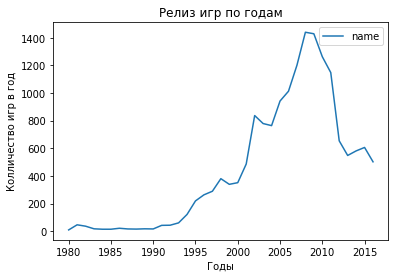

In [26]:
ga_year = data_total.pivot_table(index='year_of_release', values='name',aggfunc='count').plot(title = 'Релиз игр по годам')
ga_year.set(xlabel='Годы')
ga_year.set(ylabel='Колличество игр в год')

Исходя из графика данные по количеству игр выпущенных в определенных годах лучше всего учитывать с 1994 года, так как значения являются наиболее существенными для анаялиза.

In [27]:
data_total['platform'].value_counts()

PS2     2161
DS      2151
PS3     1330
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

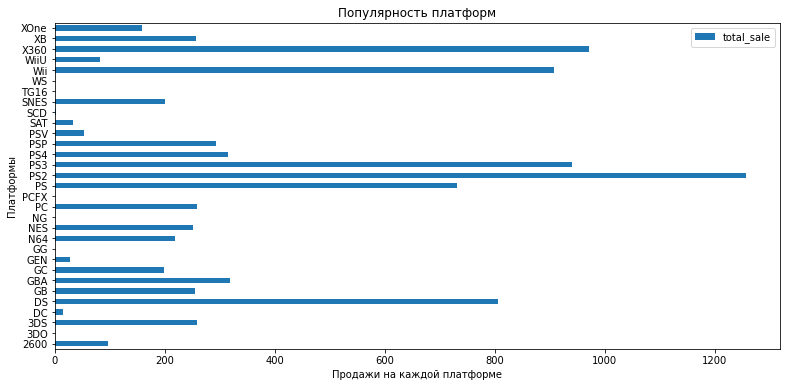

In [28]:
data_total['platform']
data_platf = data_total.pivot_table(index='platform', values='total_sale',aggfunc='sum')
data_platf.plot(
kind = 'barh',
title = 'Популярность платформ',
figsize = (13,6))
plt.xlabel('Продажи на каждой платформе')
plt.ylabel('Платформы')
plt.show()


<IntegerArray>
[2015, 2014, 2013, 2016]
Length: 4, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-999.0,-99.0,DN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-999.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,-999.0,-99.0,DN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,DN,0.01


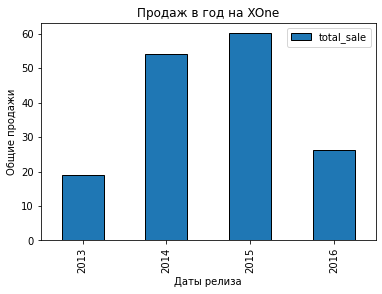

In [29]:
plat_xONE = data_total[data_total['platform']== 'XOne']
plat_xONE.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на XOne')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_xONE['year_of_release'].unique())
plat_xONE

<IntegerArray>
[2004, 2002, 2001, 2003, 2006, 2007, 2005, 2000, 2008, 2009, 2010, 2011]
Length: 12, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01


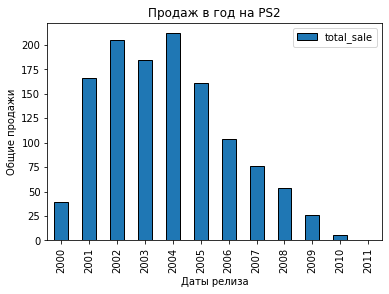

In [30]:
plat_PS2 = data_total[data_total['platform']== 'PS2']
plat_PS2 = plat_PS2[plat_PS2['year_of_release'] != 1998]
plat_PS2.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на PS2')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_PS2['year_of_release'].unique())
plat_PS2

<IntegerArray>
[2006, 2005, 2010, 2009, 2004, 2007, 2012, 2008, 2011, 2013]
Length: 10, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-999.0,-99.0,DN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,20.14
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,-999.0,-99.0,DN,18.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16656,Imagine Figure Skater (JP sales),DS,2007,Sports,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16675,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,0.01,0.00,0.00,0.00,-999.0,-99.0,DN,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,-1.0,E,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01


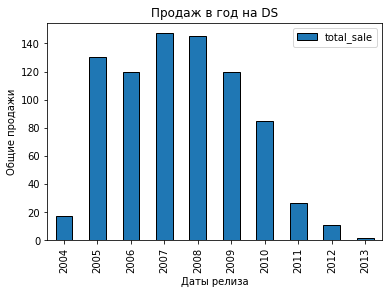

In [31]:
plat_DS = data_total[data_total['platform']== 'DS']
plat_DS = plat_DS[plat_DS['year_of_release'] != 1985]
plat_DS.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на DS')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_DS['year_of_release'].unique())
plat_DS

Из визуализации видно, что есть артефакты у платформ PS2 данные за 1998 год , хотя консоль вышла в 2000 году и у платформы DS данные за 1985 год , хотя консоль вышла в 2004 году. Убирем данные значения.

<IntegerArray>
[2013, 2012, 2011, 2010, 2009, 2008, 2007, 2014, 2006, 2015, 2016]
Length: 11, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,-999.0,-99.0,DN,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,-999.0,-99.0,DN,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,-999.0,-99.0,DN,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01


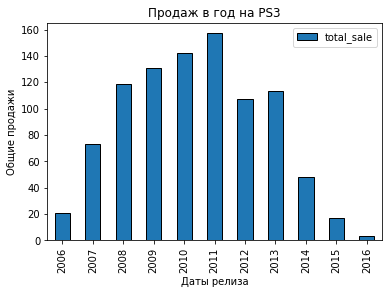

In [32]:
plat_PS3 = data_total[data_total['platform']== 'PS3']
plat_PS3 = plat_PS3[plat_PS3['year_of_release'] != 1991]
plat_PS3.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на PS3')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_PS3['year_of_release'].unique())
plat_PS3

<IntegerArray>
[2006, 2008, 2009, 2007, 2011, 2010, 2012, 2013, <NA>, 2014, 2015, 2016]
Length: 12, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008,Puzzle,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16626,The Ultimate Battle of the Sexes,Wii,2010,Misc,0.01,0.00,0.00,0.00,-999.0,-1.0,T,0.01
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01


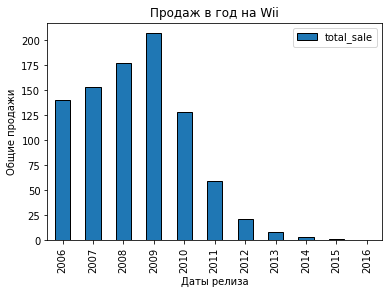

In [33]:
plat_Wii = data_total[data_total['platform']== 'Wii']
plat_Wii.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на Wii')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_Wii['year_of_release'].unique())
plat_Wii

<IntegerArray>
[2005, 2008, 2006, 2010, 2007, 2009, 2004, 2011, 2012, <NA>, 2013, 2014, 2015]
Length: 13, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
91,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,2.90,2.81,0.24,1.73,88.0,7.6,M,7.68
163,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,0.47,0.55,4.13,0.34,81.0,8.7,T,5.49
204,Grand Theft Auto: Vice City Stories,PSP,2006,Action,1.70,1.99,0.16,1.18,86.0,8.0,M,5.03
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,-999.0,-99.0,DN,4.87
272,Daxter,PSP,2006,Platform,2.45,1.01,0.00,0.75,85.0,8.7,E10+,4.21
...,...,...,...,...,...,...,...,...,...,...,...,...
16659,Hyakki Yagyou Kaidan Romance,PSP,2012,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16679,XI Coliseum,PSP,2006,Puzzle,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16687,Neo Angelique Special,PSP,2008,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01


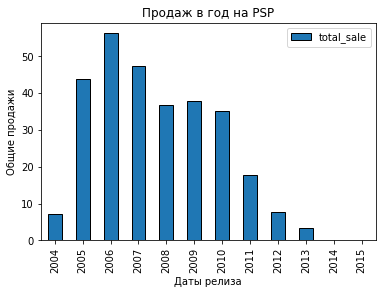

In [34]:
plat_PSP = data_total[data_total['platform']== 'PSP']
plat_PSP.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на PSP')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_PSP['year_of_release'].unique())
plat_PSP

<IntegerArray>
[1997, 1999, 1998, 1996, 2000, 1995, 2001, 2002, <NA>, 1994, 2003]
Length: 11, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
52,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,96.0,8.7,E,10.95
65,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,92.0,9.2,T,9.72
67,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,93.0,9.0,T,9.49
88,Final Fantasy VIII,PS,1999,Role-Playing,2.28,1.72,3.63,0.23,90.0,8.6,T,7.86
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,3.78,2.17,1.31,0.31,-999.0,-99.0,DN,7.57
...,...,...,...,...,...,...,...,...,...,...,...,...
16341,Builder's Block,PS,1999,Strategy,0.01,0.00,0.00,0.00,-999.0,-99.0,DN,0.01
16468,Meru Purana,PS,1996,Strategy,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16607,Samurai Shodown: Warrios Rage,PS,1999,Fighting,0.01,0.00,0.00,0.00,-999.0,-99.0,DN,0.01
16624,Crossroad Crisis,PS,2000,Puzzle,0.01,0.00,0.00,0.00,-999.0,-99.0,DN,0.01


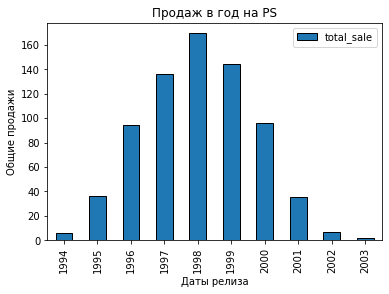

In [35]:
plat_PS = data_total[data_total['platform']== 'PS']
plat_PS.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на PS')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_PS['year_of_release'].unique())
plat_PS

<IntegerArray>
[2009, 2004, 2012, 1996, 2010, 1995, 1997, 2007, 2011, 2002, 1994, 2014, 2000,
 2001, 1992, 1998, 1999, 2003, 2013, 2008, 2015, 2005, 2016, 2006, <NA>, 1985,
 1988]
Length: 27, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.0,0.20,-999.0,-99.0,DN,5.11
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.0,0.00,-999.0,-99.0,DN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.0,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.0,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.0,0.00,60.0,7.2,E10+,0.01


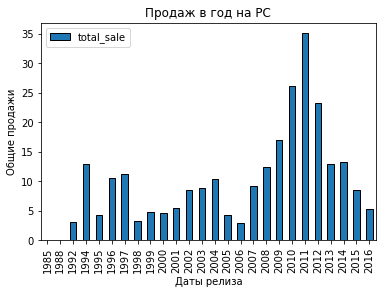

In [36]:
plat_PC = data_total[data_total['platform']== 'PC']
plat_PC.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на PC')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_PC['year_of_release'].unique())
plat_PC

<IntegerArray>
[2004, 2001, 2002, 2003, 2005, 2006, 2000, <NA>, 2007, 2008]
Length: 10, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
78,Halo 2,XB,2004,Shooter,6.82,1.53,0.05,0.08,95.0,8.2,M,8.48
129,Halo: Combat Evolved,XB,2001,Shooter,4.98,1.30,0.08,0.07,97.0,8.6,M,6.43
466,Tom Clancy's Splinter Cell,XB,2002,Action,1.85,1.04,0.00,0.13,93.0,8.5,T,3.02
508,The Elder Scrolls III: Morrowind,XB,2002,Role-Playing,2.09,0.63,0.03,0.11,87.0,8.7,T,2.86
569,Fable,XB,2004,Role-Playing,1.99,0.58,0.00,0.09,85.0,8.5,M,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16452,NHL 2K7,XB,2006,Sports,0.01,0.00,0.00,0.00,78.0,-1.0,E10+,0.01
16455,Powerdrome,XB,2004,Racing,0.01,0.00,0.00,0.00,69.0,7.0,T,0.01
16467,"Crouching Tiger, Hidden Dragon",XB,2003,Action,0.01,0.00,0.00,0.00,52.0,-1.0,T,0.01
16470,Super Bubble Pop,XB,2002,Puzzle,0.01,0.00,0.00,0.00,42.0,-1.0,E,0.01


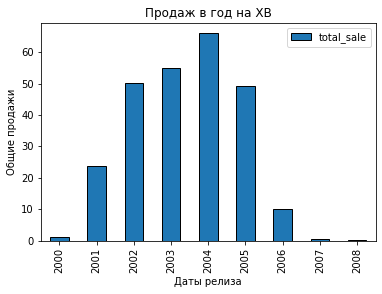

In [37]:
plat_XB = data_total[data_total['platform']== 'XB']
plat_XB.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на XB')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_XB['year_of_release'].unique())
plat_XB

<IntegerArray>
[2002, 2004, 2001, 2003, 2005, 2007, 2006]
Length: 7, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,-999.0,-99.0,DN,15.84
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,4.34,2.65,3.15,0.35,-999.0,-99.0,DN,10.49
131,Pokémon Emerald Version,GBA,2004,Role-Playing,2.57,1.58,2.06,0.21,76.0,9.0,E,6.42
162,Super Mario Advance,GBA,2001,Platform,3.14,1.24,0.91,0.20,84.0,7.8,E,5.49
166,Mario Kart: Super Circuit,GBA,2001,Racing,2.62,1.64,0.99,0.23,93.0,8.3,E,5.48
...,...,...,...,...,...,...,...,...,...,...,...,...
16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.00,0.00,72.0,-1.0,T,0.01
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,0.01
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.0,-1.0,E,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,-999.0,-99.0,DN,0.01


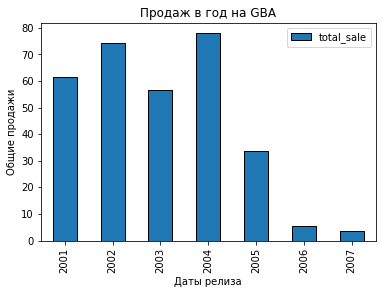

In [38]:
plat_GBA = data_total[data_total['platform']== 'GBA']
plat_GBA = plat_GBA[plat_GBA['year_of_release'] != 2000]
plat_GBA.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на GBA')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_GBA['year_of_release'].unique())
plat_GBA

<IntegerArray>
[2001, 2003, 2002, 2004, 2005, 2006, <NA>, 2007]
Length: 8, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
111,Super Smash Bros. Melee,GC,2001,Fighting,4.41,1.04,1.39,0.22,92.0,9.1,T,7.06
112,Mario Kart: Double Dash!!,GC,2003,Racing,4.12,1.77,0.87,0.19,-999.0,-99.0,DN,6.95
136,Super Mario Sunshine,GC,2002,Platform,4.01,1.26,0.87,0.17,92.0,8.6,E,6.31
233,The Legend of Zelda: The Wind Waker,GC,2002,Action,2.60,0.99,0.89,0.13,96.0,8.9,E,4.61
356,Luigi's Mansion,GC,2001,Action,2.38,0.67,0.46,0.10,78.0,8.5,E,3.61
...,...,...,...,...,...,...,...,...,...,...,...,...
16522,Virtua Quest,GC,<NA>,Role-Playing,0.01,0.00,0.00,0.00,55.0,5.5,T,0.01
16565,Egg Mania: Eggstreme Madness,GC,2002,Puzzle,0.01,0.00,0.00,0.00,64.0,8.0,E,0.01
16577,Space Raiders,GC,2003,Shooter,0.01,0.00,0.00,0.00,40.0,-1.0,T,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.0,-1.0,E,0.01


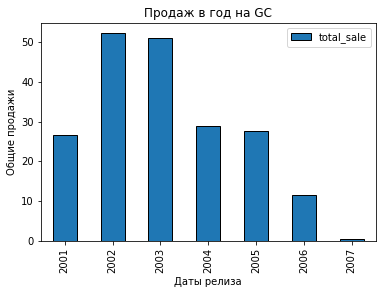

In [39]:
plat_GC = data_total[data_total['platform']== 'GC']
plat_GC.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на GC')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_GC['year_of_release'].unique())
plat_GC

<IntegerArray>
[2013, 2011, 2014, 2012, 2016, 2015]
Length: 6, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-999.0,-99.0,DN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-999.0,-99.0,DN,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16653,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,0.00,0.01,0.00,0.00,-999.0,-99.0,DN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01


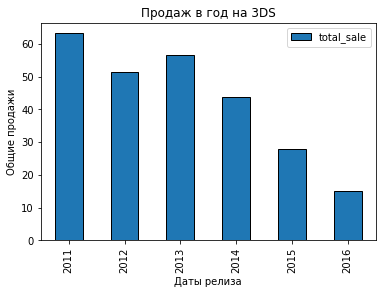

In [40]:
plat_3DS = data_total[data_total['platform']== '3DS']
plat_3DS = plat_3DS[plat_3DS['year_of_release'] != 2000]
plat_3DS = plat_3DS[plat_3DS['year_of_release'] != 2010]
plat_3DS.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на 3DS')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_3DS['year_of_release'].unique())
plat_3DS

<IntegerArray>
[2014, 2011, 2012, 2013, 2015, 2016, <NA>]
Length: 7, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
868,Minecraft,PSV,2014,Misc,0.18,0.64,0.90,0.24,-999.0,-99.0,DN,1.96
1219,Uncharted: Golden Abyss,PSV,2011,Shooter,0.53,0.66,0.13,0.22,80.0,7.4,T,1.54
1294,Call of Duty Black Ops: Declassified,PSV,2012,Action,0.71,0.43,0.07,0.26,33.0,4.8,M,1.47
1485,Assassin's Creed III: Liberation,PSV,2012,Action,0.53,0.48,0.06,0.24,70.0,7.2,M,1.31
1595,LittleBigPlanet PS Vita,PSV,2012,Platform,0.35,0.61,0.02,0.27,88.0,8.6,E,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01


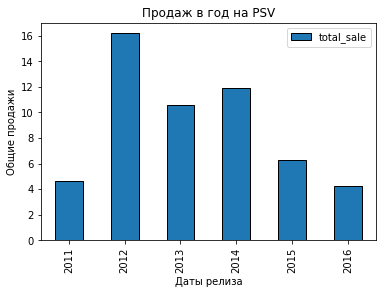

In [41]:
plat_PSV = data_total[data_total['platform']== 'PSV']
plat_PSV.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на PSV')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_PSV['year_of_release'].unique())
plat_PSV

<IntegerArray>
[2015, 2014, 2016, 2013]
Length: 4, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-999.0,-99.0,DN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-999.0,-99.0,DN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,DN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


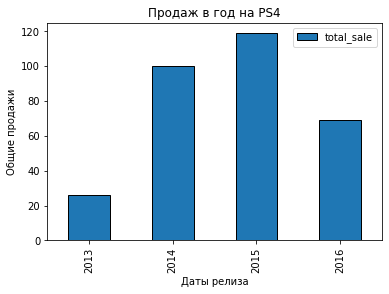

In [42]:
plat_PS4 = data_total[data_total['platform']== 'PS4']
plat_PS4.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на PS4')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_PS4['year_of_release'].unique())
plat_PS4

<IntegerArray>
[1996, 1997, 1998, 1999, 2000, 2001, 2004, <NA>, 2002]
Length: 9, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
45,Super Mario 64,N64,1996,Platform,6.91,2.85,1.91,0.23,-999.0,-99.0,DN,11.90
63,Mario Kart 64,N64,1996,Racing,5.55,1.94,2.23,0.15,-999.0,-99.0,DN,9.87
82,GoldenEye 007,N64,1997,Shooter,5.80,2.01,0.13,0.15,-999.0,-99.0,DN,8.09
93,The Legend of Zelda: Ocarina of Time,N64,1998,Action,4.10,1.89,1.45,0.16,-999.0,-99.0,DN,7.60
158,Super Smash Bros.,N64,1999,Fighting,2.95,0.60,1.97,0.04,-999.0,-99.0,DN,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...
14563,Charlie Blasts Territory,N64,1999,Action,0.02,0.01,0.00,0.00,-999.0,-99.0,DN,0.03
15462,Super Bowling,N64,1999,Sports,0.02,0.00,0.00,0.00,-999.0,-99.0,DN,0.02
15463,Rat Attack!,N64,2000,Puzzle,0.02,0.00,0.00,0.00,-999.0,-99.0,DN,0.02
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,-999.0,-99.0,DN,0.01


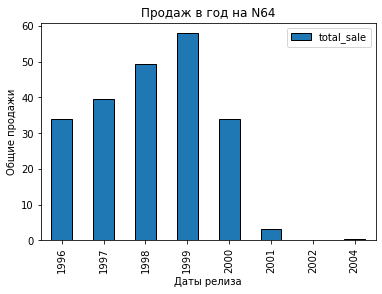

In [43]:
plat_N64 = data_total[data_total['platform']== 'N64']
plat_N64.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на N64')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_N64['year_of_release'].unique())
plat_N64

<IntegerArray>
[1990, 1993, 1994, 1992, 1995, 1991, 1996, 1997, 1999, 1998]
Length: 10, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,-999.0,-99.0,DN,20.62
56,Super Mario All-Stars,SNES,1993,Platform,5.99,2.15,2.12,0.29,-999.0,-99.0,DN,10.55
71,Donkey Kong Country,SNES,1994,Platform,4.36,1.71,3.00,0.23,-999.0,-99.0,DN,9.30
76,Super Mario Kart,SNES,1992,Racing,3.54,1.24,3.81,0.18,-999.0,-99.0,DN,8.77
137,Street Fighter II: The World Warrior,SNES,1992,Fighting,2.47,0.83,2.87,0.12,-999.0,-99.0,DN,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...
14974,The Great Battle Gaiden 2: Matsuri da Wasshoi,SNES,1994,Action,0.00,0.00,0.03,0.00,-999.0,-99.0,DN,0.03
15255,Super Nazo Puyo Tsuu: Ruruu no Tetsuwan Hanjyouki,SNES,1996,Puzzle,0.00,0.00,0.02,0.00,-999.0,-99.0,DN,0.02
15339,Sugoi Hebereke,SNES,1994,Fighting,0.00,0.00,0.02,0.00,-999.0,-99.0,DN,0.02
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,-999.0,-99.0,DN,0.02


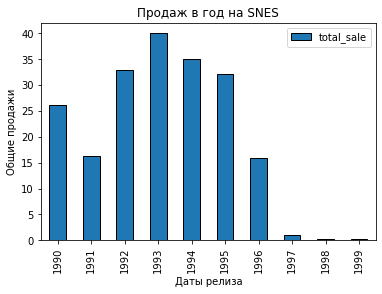

In [44]:
plat_SNES = data_total[data_total['platform']== 'SNES']
plat_SNES.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на SNES')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_SNES['year_of_release'].unique())
plat_SNES

<IntegerArray>
[1995, 1994, 1996, 1997, 1998, 1999]
Length: 6, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
893,Virtua Fighter 2,SAT,1995,Fighting,0.34,0.26,1.30,0.03,-999.0,-99.0,DN,1.93
1748,Sega Rally Championship,SAT,1995,Racing,0.21,0.16,0.77,0.02,-999.0,-99.0,DN,1.16
1920,Virtua Fighter,SAT,1994,Fighting,0.17,0.12,0.77,0.02,-999.0,-99.0,DN,1.08
3222,Virtua Cop,SAT,1995,Shooter,0.00,0.00,0.62,0.00,-999.0,-99.0,DN,0.62
3254,Fighters MEGAMiX,SAT,1996,Fighting,0.00,0.00,0.62,0.00,-999.0,-99.0,DN,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...
15007,America Oudan Ultra-Quiz,SAT,1995,Misc,0.00,0.00,0.02,0.00,-999.0,-99.0,DN,0.02
15266,Shippuu Mahou Daisakusen: Kingdom-Grandprix,SAT,1996,Shooter,0.00,0.00,0.02,0.00,-999.0,-99.0,DN,0.02
15340,Pebble Beach Golf Links,SAT,1994,Sports,0.00,0.00,0.02,0.00,-999.0,-99.0,DN,0.02
15372,NightTruth: Explanation of the Paranormal - Th...,SAT,1996,Misc,0.00,0.00,0.02,0.00,-999.0,-99.0,DN,0.02


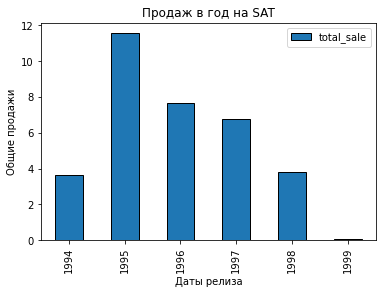

In [45]:
plat_SAT = data_total[data_total['platform']== 'SAT']
plat_SAT.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на SAT')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_SAT['year_of_release'].unique())
plat_SAT

<IntegerArray>
[2014, 2012, 2015, 2013, 2016]
Length: 5, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
185,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84.0,8.1,E,5.23
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,-999.0,-99.0,DN,4.87
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
248,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.0,7.9,E10+,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...
16376,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.00,0.00,0.01,0.00,-999.0,-99.0,DN,0.01
16412,Legend of Kay Anniversary,WiiU,2015,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01
16420,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,0.01
16510,Art Academy: Home Studio,WiiU,2015,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01


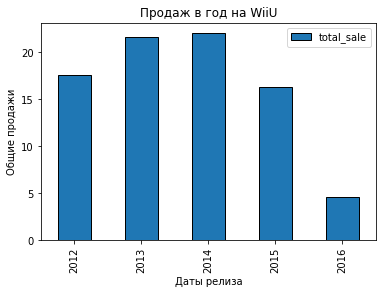

In [46]:
plat_WiiU = data_total[data_total['platform']== 'WiiU']
plat_WiiU.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на WiiU')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_WiiU['year_of_release'].unique())
plat_WiiU

<IntegerArray>
[1982, 1981, 1980, <NA>, 1983, 1987, 1988, 1989, 1985, 1986, 1984]
Length: 11, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.0,0.08,-999.0,-99.0,DN,7.81
240,Pitfall!,2600,1981,Platform,4.21,0.24,0.0,0.05,-999.0,-99.0,DN,4.50
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.0,0.05,-999.0,-99.0,DN,4.31
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,-999.0,-99.0,DN,2.76
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.0,0.03,-999.0,-99.0,DN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
8741,Klax,2600,1989,Puzzle,0.14,0.01,0.0,0.00,-999.0,-99.0,DN,0.15
9095,Krull,2600,1982,Action,0.13,0.01,0.0,0.00,-999.0,-99.0,DN,0.14
9487,RealSports Volleyball,2600,1981,Sports,0.12,0.01,0.0,0.00,-999.0,-99.0,DN,0.13
11747,Super Football,2600,1987,Sports,0.07,0.00,0.0,0.00,-999.0,-99.0,DN,0.07


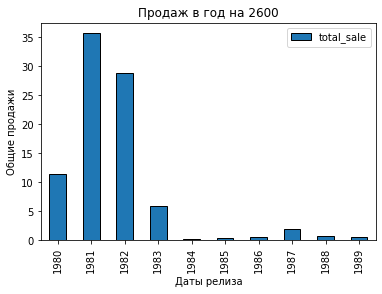

In [47]:
plat_2600 = data_total[data_total['platform']== '2600']
plat_2600.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title = 'Продаж в год на 2600')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_2600['year_of_release'].unique())
plat_2600

<IntegerArray>
[1985, 1984, 1988, 1986, 1990, 1987, 1989, 1983, 1993, 1991, 1992, 1994]
Length: 12, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999.0,-99.0,DN,40.24
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-999.0,-99.0,DN,28.31
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,-999.0,-99.0,DN,17.28
98,Super Mario Bros. 2,NES,1988,Platform,5.39,1.18,0.70,0.19,-999.0,-99.0,DN,7.46
124,The Legend of Zelda,NES,1986,Action,3.74,0.93,1.69,0.14,-999.0,-99.0,DN,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5858,Famista '91,NES,1990,Sports,0.00,0.00,0.30,0.00,-999.0,-99.0,DN,0.30
6139,Famista '92,NES,1991,Sports,0.00,0.00,0.28,0.00,-999.0,-99.0,DN,0.28
10290,Final Fantasy I & II,NES,1994,Role-Playing,0.00,0.00,0.11,0.00,-999.0,-99.0,DN,0.11
12022,Teenage Mutant Ninja Turtles: Tournament Fighters,NES,1992,Fighting,0.04,0.01,0.02,0.00,-999.0,-99.0,DN,0.07


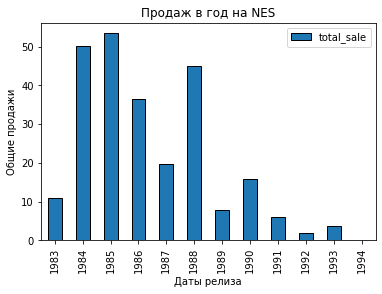

In [48]:
plat_NES = data_total[data_total['platform']== 'NES']
plat_NES.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title ='Продаж в год на NES')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_NES['year_of_release'].unique())
plat_NES

<IntegerArray>
[1985, 1984, 1988, 1986, 1990, 1987, 1989, 1983, 1993, 1991, 1992, 1994]
Length: 12, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16622,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,-999.0,-99.0,DN,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,-999.0,-1.0,M,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,-999.0,5.1,E10+,0.01


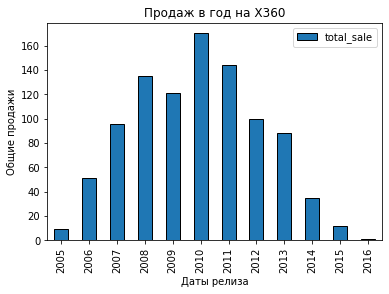

In [49]:
plat_X360 = data_total[data_total['platform']== 'X360']
plat_X360.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(kind='bar', edgecolor='black', title ='Продаж в год на X360')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')
display(plat_NES['year_of_release'].unique())
plat_X360

Text(0, 0.5, 'Общие продажи')

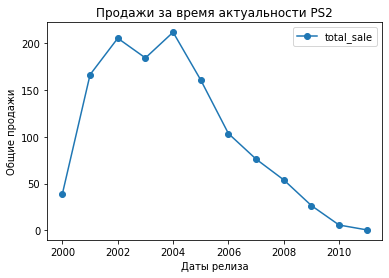

In [50]:
plat_PS2.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(marker='o', title='Продажи за время актуальности PS2')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')

Text(0, 0.5, 'Общие продажи')

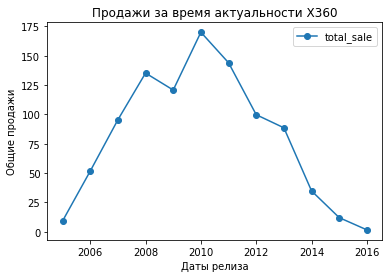

In [51]:
plat_X360.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(marker='o', title='Продажи за время актуальности X360')
plt.xlabel('Даты релиза')
plt.ylabel('Общие продажи')

<AxesSubplot:title={'center':'Продажи за время актуальности PS3'}, xlabel='year_of_release'>

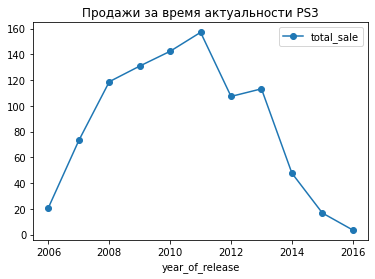

In [52]:
plat_PS3.pivot_table(index='year_of_release', values='total_sale',aggfunc='sum').plot(marker='o', title='Продажи за время актуальности PS3')

Исходя вышесделанных данных следует то, что новые платформы появляются через 10 лет после выхода предыдущейБ например XOne 2015 год начала продаж и X360 - 2005 год начала продаж.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [54]:
data_total_new = data_total[data_total['year_of_release'] >= 2014]
plat_PS4 = data_total_new[data_total_new['platform']== 'PS4']
plat_xONE = data_total_new[data_total_new['platform']== 'xONE']
plat_3DS = data_total_new[data_total_new['platform']== '3DS']
plat_PC = data_total_new[data_total_new['platform']== 'PC']
plat_PS3 = data_total_new[data_total_new['platform']== 'PS3']
plat_PSV = data_total_new[data_total_new['platform']== 'PSV']
plat_WiiU = data_total_new[data_total_new['platform']== 'WiiU']
plat_X360 = data_total_new[data_total_new['platform']== 'X360']

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [55]:
pop_platform = data_total_new.pivot_table(index='platform', values='total_sale', aggfunc = 'sum')
pop_platform.sort_values(by='total_sale',ascending=False).head(10)

,total_sale
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Потенциально прибыльными платформами являются 8 платформ с наибольшими продажами , лидирами среди них по продаже PS4 и XOne.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Общие продажи')

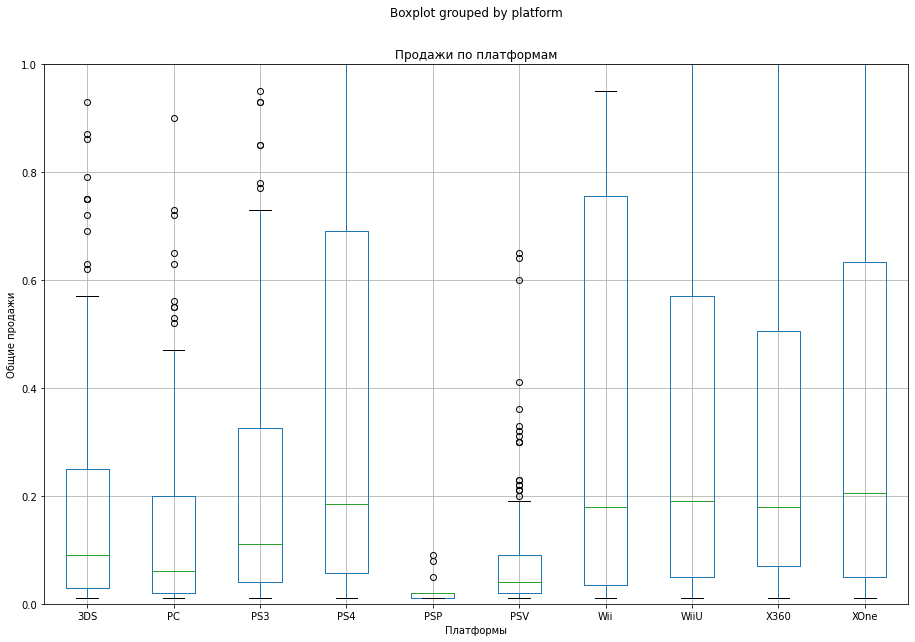

In [56]:
data_total_new.query('platform in @pop_platform.index').boxplot(by='platform', column='total_sale',figsize=(15, 10),vert=True)
plt.ylim(0,1)
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

На графике с усами «ящик с усами» видны 5 лидирующих по продажам платформ (PS4, Wii, WiiU, X360, XOne) по значению медианы находящимися примерно на одном уровне 0,2 , хотя у XOne и выше значение медианы (на немного) чем у PS4, но все же у PS4 значения 3-го квартиля больше, что делает ее лидиром в продажах , хоть и не существенно.  Аутсайдерами же по продажам явно можно назвать платформы PSP и PSV примерно на значении 0,03 и 0,02. 

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

В качестве популярных платформ возьмем те что представленны выше и построим корреляцию влияния отзывов критиков и юзеров на продажи на данной платформе.

Данные за актуальнный период сохранены в датасет data_total_new. Из данных этого датафрейма построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [57]:
# Комментарий ревьюера
plat_PS4.year_of_release.min()

2014

<AxesSubplot:title={'center':'Диаграмма рассеяния'}, xlabel='Обшие продажи', ylabel='Отзывы критиков'>

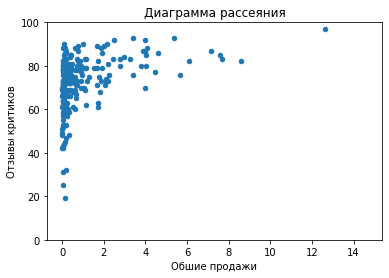

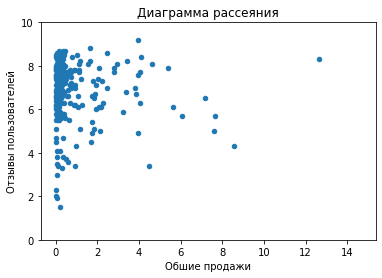

In [58]:
plat_PS4 = data_total_new[data_total_new['platform']== 'PS4']
current_PS4 = plat_PS4.plot(x='total_sale', y='critic_score', kind='scatter')
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.ylim(0, 100)
plt.title('Диаграмма рассеяния')
plat_PS4.plot(x='total_sale', y='user_score', kind='scatter')
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы пользователей')
plt.title('Диаграмма рассеяния')
plt.ylim(0, 10)
current_PS4

In [59]:
corr_crit_PS4 = plat_PS4['critic_score'].corr(plat_PS4['total_sale'])
plat_PS4['user_score'] = plat_PS4['user_score'].astype('float64')
corr_user_PS4 = plat_PS4['total_sale'].corr(plat_PS4['user_score'])
print("Корреляция по отзывам критиков", corr_crit_PS4)
print("Корреляция по отзывам пользователей", corr_user_PS4)

Корреляция по отзывам критиков 0.13519740820485093
Корреляция по отзывам пользователей 0.10472974713970451


/tmp/ipykernel_262/3968986636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_PS4['user_score'] = plat_PS4['user_score'].astype('float64')


/tmp/ipykernel_262/3613780793.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_xONE['user_score'] = plat_xONE['user_score'].astype('float64')


Корреляция по отзывам критиков 0.1876669808957339
Корреляция по отзывам пользователей 0.08272048414435312


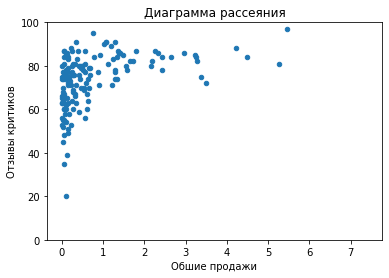

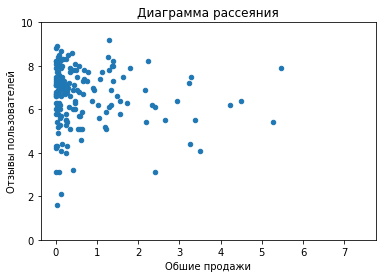

In [61]:
plat_xONE = data_total_new[data_total_new['platform']== 'XOne']
plat_xONE.plot(x='total_sale', y='critic_score', kind='scatter')
plt.ylim(0, 100)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.ylim(0, 100)
plt.title('Диаграмма рассеяния')
plat_xONE.plot(x='total_sale', y='user_score', kind='scatter')
plt.ylim(0, 10)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы пользователей')
plt.title('Диаграмма рассеяния')
corr_crit_xONE = plat_xONE['critic_score'].corr(plat_xONE['total_sale'])
plat_xONE['user_score'] = plat_xONE['user_score'].astype('float64')
corr_user_xONE = plat_xONE['total_sale'].corr(plat_xONE['user_score'])
print("Корреляция по отзывам критиков", corr_crit_xONE)
print("Корреляция по отзывам пользователей", corr_user_xONE)

Корреляция по отзывам критиков 0.034664953394222146
Корреляция по отзывам пользователей -0.018649909375501785


/tmp/ipykernel_262/2529195859.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_3DS['user_score'] = plat_3DS['user_score'].astype('float64')


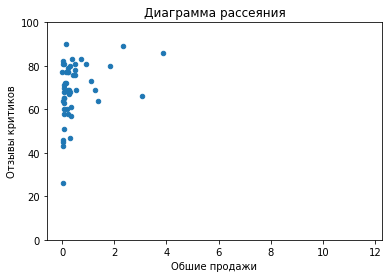

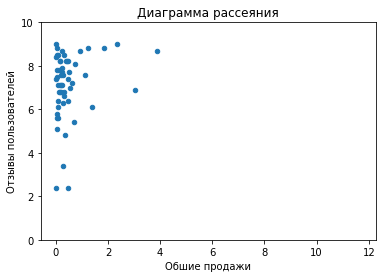

In [63]:
plat_3DS = data_total_new[data_total_new['platform']== '3DS']
plat_3DS.plot(x='total_sale', y='critic_score', kind='scatter')
plt.ylim(0, 100)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.ylim(0, 100)
plt.title('Диаграмма рассеяния')
plat_3DS.plot(x='total_sale', y='user_score', kind='scatter')
plt.ylim(0, 10)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы пользователей')
plt.title('Диаграмма рассеяния')
corr_crit_3DS = plat_3DS['critic_score'].corr(plat_3DS['total_sale'])
plat_3DS['user_score'] = plat_3DS['user_score'].astype('float64')
corr_user_3DS = plat_3DS['total_sale'].corr(plat_3DS['user_score'])
print("Корреляция по отзывам критиков", corr_crit_3DS)
print("Корреляция по отзывам пользователей", corr_user_3DS)

Корреляция по отзывам критиков 0.15029776896904687
Корреляция по отзывам пользователей 0.07882969049750521


/tmp/ipykernel_262/3474269708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_PC['user_score'] = plat_PC['user_score'].astype('float64')


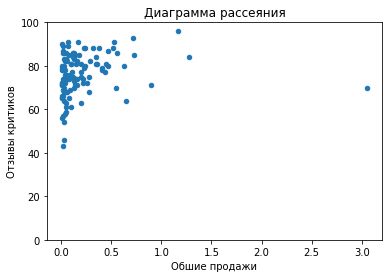

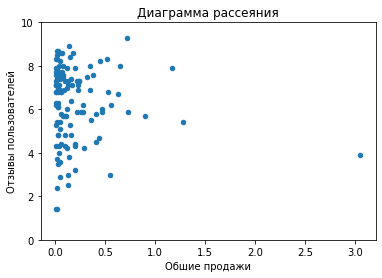

In [65]:
plat_PC = data_total_new[data_total_new['platform']== 'PC']
plat_PC.plot(x='total_sale', y='critic_score', kind='scatter')
plt.ylim(0, 100)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.ylim(0, 100)
plt.title('Диаграмма рассеяния')
plat_PC.plot(x='total_sale', y='user_score', kind='scatter')
plt.ylim(0, 10)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы пользователей')
plt.title('Диаграмма рассеяния')
corr_crit_PC = plat_PC['critic_score'].corr(plat_PC['total_sale'])
plat_PC['user_score'] = plat_PC['user_score'].astype('float64')
corr_user_PC = plat_PC['total_sale'].corr(plat_PC['user_score'])
print("Корреляция по отзывам критиков", corr_crit_PC)
print("Корреляция по отзывам пользователей", corr_user_PC)


Корреляция по отзывам критиков 0.004314233526994505
Корреляция по отзывам пользователей 0.18829437323068662


/tmp/ipykernel_262/2002191627.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_PS3['user_score'] = plat_PS3['user_score'].astype('float64')


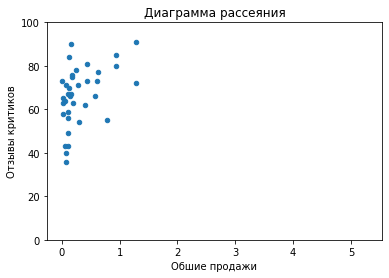

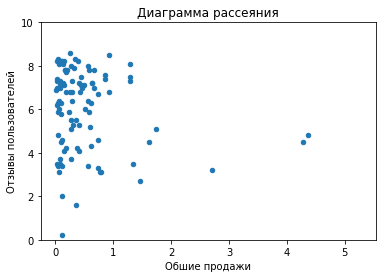

In [67]:
plat_PS3 = data_total_new[data_total_new['platform']== 'PS3']
plat_PS3.plot(x='total_sale', y='critic_score', kind='scatter')
plt.ylim(0, 100)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.ylim(0, 100)
plt.title('Диаграмма рассеяния')
plat_PS3.plot(x='total_sale', y='user_score', kind='scatter')
plt.ylim(0, 10)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы пользователей')
plt.title('Диаграмма рассеяния')
corr_crit_PS3 = plat_PS3['critic_score'].corr(plat_PS3['total_sale'])
plat_PS3['user_score'] = plat_PS3['user_score'].astype('float64')
corr_user_PS3 = plat_PS3['total_sale'].corr(plat_PS3['user_score'])
print("Корреляция по отзывам критиков", corr_crit_PS3)
print("Корреляция по отзывам пользователей", corr_user_PS3)


Корреляция по отзывам критиков -0.037861048661940136
Корреляция по отзывам пользователей 0.08720682089387478


/tmp/ipykernel_262/209861534.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_X360['user_score'] = plat_X360['user_score'].astype('float64')


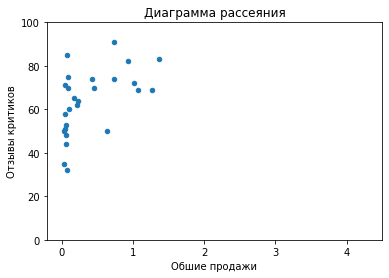

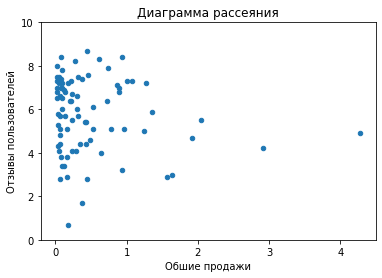

In [69]:
plat_X360 = data_total_new[data_total_new['platform']== 'X360']
plat_X360.plot(x='total_sale', y='critic_score', kind='scatter')
plt.ylim(0, 100)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.title('Диаграмма рассеяния')
plat_X360.plot(x='total_sale', y='user_score', kind='scatter')
plt.ylim(0, 10)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы пользователей')
plt.title('Диаграмма рассеяния')
corr_crit_X360 = plat_X360['critic_score'].corr(plat_X360['total_sale'])
plat_X360['user_score'] = plat_X360['user_score'].astype('float64')
corr_user_X360 = plat_X360['total_sale'].corr(plat_X360['user_score'])
print("Корреляция по отзывам критиков", corr_crit_X360)
print("Корреляция по отзывам пользователей", corr_user_X360)


Корреляция по отзывам критиков 0.21636066583141114
Корреляция по отзывам пользователей 0.11675618145536047


/tmp/ipykernel_262/1626753655.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_WiiU['user_score'] = plat_WiiU['user_score'].astype('float64')


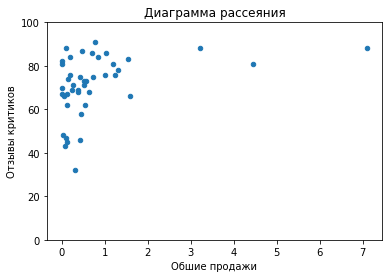

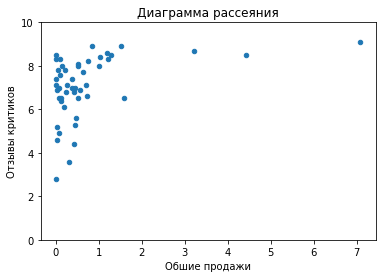

In [71]:
plat_WiiU = data_total_new[data_total_new['platform']== 'WiiU']
plat_WiiU.plot(x='total_sale', y='critic_score', kind='scatter')
plt.ylim(0, 100)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.title('Диаграмма рассеяния')
plat_WiiU.plot(x='total_sale', y='user_score', kind='scatter')
plt.ylim(0, 10)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.title('Диаграмма рассеяния')
corr_crit_WiiU = plat_WiiU['critic_score'].corr(plat_WiiU['total_sale'])
plat_WiiU['user_score'] = plat_WiiU['user_score'].astype('float64')
corr_user_WiiU = plat_WiiU['total_sale'].corr(plat_WiiU['user_score'])
print("Корреляция по отзывам критиков", corr_crit_WiiU)
print("Корреляция по отзывам пользователей", corr_user_WiiU)

Корреляция по отзывам критиков 0.24381879259179265
Корреляция по отзывам пользователей 0.2735066155164272


/tmp/ipykernel_262/286613818.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plat_PSV['user_score'] = plat_PSV['user_score'].astype('float64')


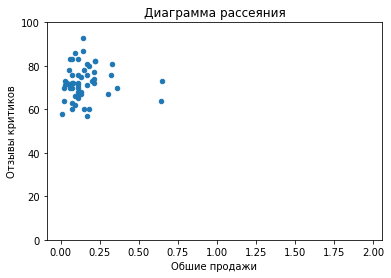

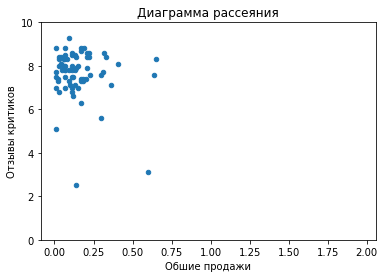

In [73]:
plat_PSV = data_total_new[data_total_new['platform']== 'PSV']
plat_PSV.plot(x='total_sale', y='critic_score', kind='scatter')
plt.ylim(0, 100)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.title('Диаграмма рассеяния')
plat_PSV.plot(x='total_sale', y='user_score', kind='scatter')
plt.ylim(0, 10)
plt.xlabel('Обшие продажи')
plt.ylabel('Отзывы критиков')
plt.title('Диаграмма рассеяния')
corr_crit_PSV = plat_PSV['critic_score'].corr(plat_PSV['total_sale'])
plat_PSV['user_score'] = plat_PSV['user_score'].astype('float64')
corr_user_PSV = plat_PSV['total_sale'].corr(plat_PSV['user_score'])
print("Корреляция по отзывам критиков", corr_crit_PSV)
print("Корреляция по отзывам пользователей", corr_user_PSV)

Из граффиков видно что зависимость между отзывами юзеров и отзывами критиков с показателем продаж разная, что рейтинг пользователей показывает более разброссанные результаты чем отзывы критиков на диаграммах но это относится только к новым платформам (начиная со третьего покаления платформ PS3 и Xbox360)и чем новее платформа тем больше прослеживается зависимость , скорей всего это связанно из-за доступности способности оставляния отзывов в актуальное время.

 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,total_sale
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Text(0, 0.5, 'Жанры')

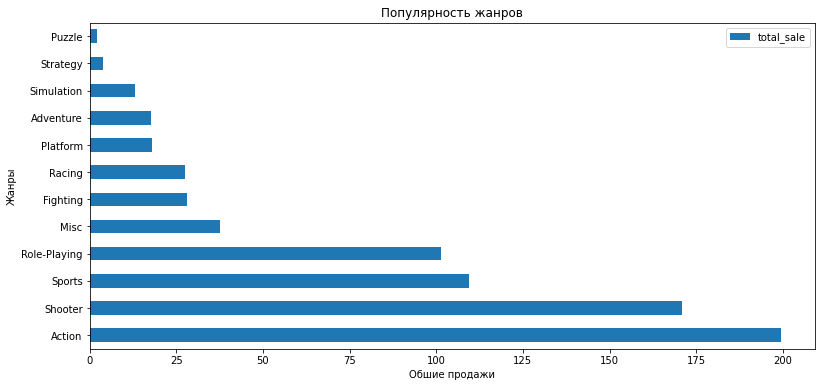

In [74]:
most_sale_ge = data_total_new.pivot_table(index='genre', values='total_sale', aggfunc = 'sum')
most_sale_ge = most_sale_ge.sort_values(by='total_sale',ascending=False)
display(most_sale_ge)
most_sale_ge.plot(
kind = 'barh',
title = 'Популярность жанров',
figsize = (13,6))
plt.xlabel('Обшие продажи')
plt.ylabel('Жанры')

Text(0, 0.5, 'Общие продажи')

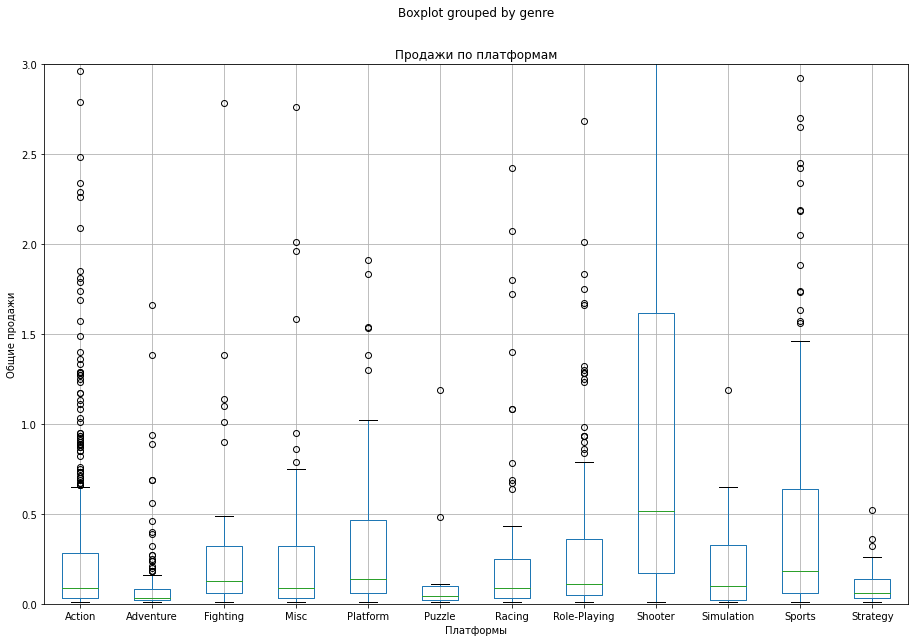

In [75]:
data_total_new.boxplot(by='genre', column='total_sale',figsize=(15, 10),vert=True)
plt.ylim(0,3)
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

Жанры с самым высоким показателями оказались : action, shooter и sports.
Но в среднем самым прибыльным является shooter и sports так как данные категории имеют наивысшую медиану. Самыми не популярными и не востребовательными являются: puzzle и strategy
Эти выводы сделаны исходя из графика и диаграммы размаха указанных выше.

## Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Для начала создадим датафрейм под каждый регион для того, чтобы удобнее было строить сводные таблицы для создания топ-5.
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [76]:
na_stat = data_total_new[['na_sales','platform', 'genre', 'rating']]
eu_stat = data_total_new[['eu_sales','platform', 'genre', 'rating']]
jp_stat = data_total_new[['jp_sales','platform', 'genre', 'rating']]

Далее создаем топ-5 платформ по регионам продаж.

array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

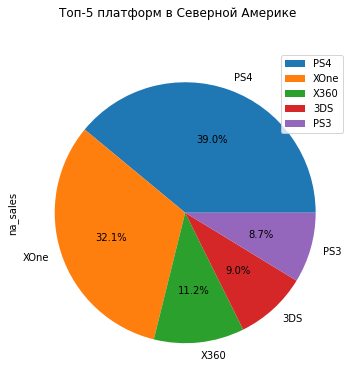

In [77]:
na_pl_st = na_stat.pivot_table(index='platform', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False).head(5)
na_pl_st.plot(
kind='pie',
autopct='%1.1f%%',
subplots=True,
title = 'Топ-5 платформ в Северной Америке',
figsize = (8,6))

В среднем самая популярная консоль в na это PS4 конкурируя с XOne.

array([<AxesSubplot:ylabel='eu_sales'>], dtype=object)

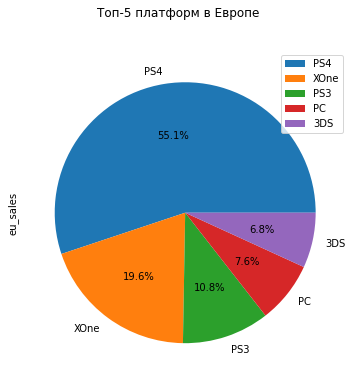

In [78]:
eu_pl_st = eu_stat.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).head(5)
eu_pl_st.plot(
kind='pie',
autopct='%1.1f%%',
subplots=True,
title = 'Топ-5 платформ в Европе',
figsize = (8,6))

В среднем самая популярная консоль в eu это PS4.

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

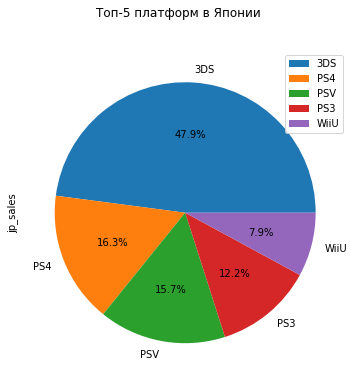

In [79]:
jp_pl_st = jp_stat.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).head(5)
jp_pl_st.plot(
kind='pie',
autopct='%1.1f%%',
subplots=True,
title = 'Топ-5 платформ в Японии',
figsize = (8,6))

В среднем самая популярная консоль в jp это 3DS.

Среди платформ в Америке и Европе в основной конкурировали PS4 и XOne  значения  по продажам в регионах этих платформ почти равны в америке, что нельзя сказать про Европу в которой 50% процентов рынка занимает PS4, Японский рынок здесь бум продаж в основном пришел на другое время и самой популярной по продажам платформой является 3DS. 

Самые популярные жанры (топ-5). 

array([<AxesSubplot:ylabel='na_sales'>], dtype=object)

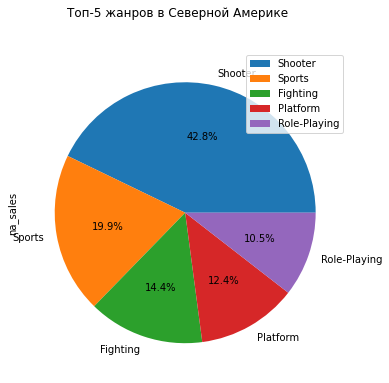

In [80]:
na_ge_st = na_stat.pivot_table(index='genre', values='na_sales', aggfunc = 'mean').sort_values(by='na_sales',ascending=False).head(5)
na_ge_st.plot(
kind='pie',
autopct='%1.1f%%',
subplots=True,
title = 'Топ-5 жанров в Северной Америке',
figsize = (8,6))

В Северной Америке самый продаваемый жанр это шутеры.

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


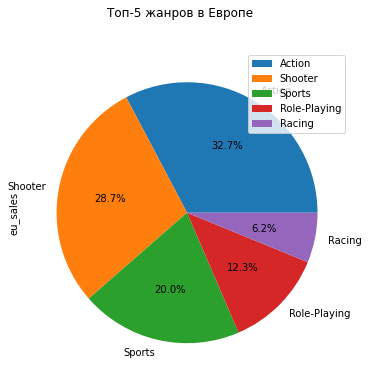

In [81]:
eu_ge_st = eu_stat.pivot_table(index='genre', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).head(5)
eu_ge_st.plot(
kind='pie',
autopct='%1.1f%%',
subplots=True,
title = 'Топ-5 жанров в Европе',
figsize = (8,6))
eu_ge_st

В регионе eu популярными жанрами видеоигр являются экшены.

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

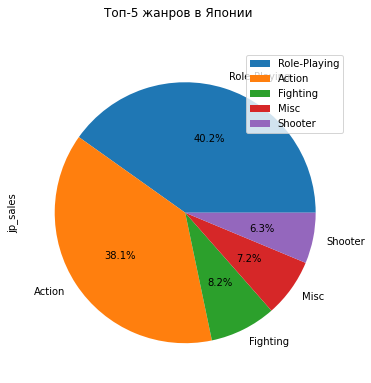

In [82]:
jp_ge_st = jp_stat.pivot_table(index='genre', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).head(5)
jp_ge_st.plot(
kind='pie',
autopct='%1.1f%%',
subplots=True,
title = 'Топ-5 жанров в Японии',
figsize = (8,6))

В регионе jp самый популярный жанр Role-Playing.

 По жанрам:
- В японии самый популярный жанр , безоговорочно role-playing
- В европе почтии с 4%  отрывом от категории спортивных игр лидирует жанр экшенов над шутерами
- в Америке с огромной разницой в показатели продаж лидируют шутеры, на втором месте спорт 
- шутеры больше всего нравятся в Европе и Америке 

In [83]:
na_stat.pivot_table(index='rating', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False)

,na_sales
rating,
M,96.42
DN,64.72
E,50.74
T,38.95
E10+,33.23


In [84]:
eu_stat.pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False)

,eu_sales
rating,
M,93.44
DN,58.95
E,58.06
T,34.07
E10+,26.16


In [85]:
jp_stat.pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False)

,jp_sales
rating,
DN,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Из проделанных выше рейтингов можно сделать вывод, что рейтинг все таки влияет на продажи в регионе.
В регионах na и eu зависимость одинаковая, в отличаи от jp где строго все наоборот.

## Шаг 5. Проверьте гипотезы

Задание 1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Так как в задании не указано что рейтинги "больше" или "меньше" , а именно одинаковыемы понимаем , что нулевая гипотиза должна содержать равенство, в данном случае нулевой гипотизой является "Рейтинг пользователей платформы PC и XOne равны".

Альтернативная гипотиза же  должна быть взаимоискулючающей нулевой поэтому альтернативная гипотеза звучит так :"Рейтинги пользователей платформы PC и XOne разные". 
Для того, чтобы понять каким методом нам проверить гипотизу нам нужно проверить удовлятворяют ли выборки данных трем условиям
1)Генеральные совокупности не зависят друг от друга - это так, у обеих платформ продажи независят друг от друга
2)Выборочные средние нормально распределены
3)Дисперсии рассматриваемых генеральных совокупностей равны

In [87]:
data_xONE = data_total_new[data_total_new['platform'] == 'XOne']['user_score'].dropna()
data_PC = data_total_new[data_total_new['platform'] == 'PC']['user_score'].dropna()
print('Среднее XOne',data_xONE.mean())
print('Среднее PC',data_PC.mean())


Среднее XOne -17.854824561403507
Среднее PC -10.679470198675496


In [88]:
print('Дисперсия XOne',np.var(data_xONE))
print('Дисперсия PC',np.var(data_PC))

Дисперсия XOne 1949.4010732148354
Дисперсия PC 1478.132359984211


Так как дисперсии отличаются значение equal_var принимаем как False чтобы тест на объеденил выборки в одну.

In [89]:
alpha = 0.05
results = st.ttest_ind(data_xONE, data_PC, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0956432267722246
Не получилось отвергнуть нулевую гипотезу


В данном случае не получилось отвергнуть нулевую гипотизу, так как значение p-value привышает уровень значимости (0,05).

Задание 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В задании 2 такая же ситуация как и в первой задание подразумевает что нулевая гипотеза должна содержать равенсто. 

В данной гипотизе ,нулевой гипотизой выступает "Рейтинг пользователей Action и sports равны"

Алтернативная же гипотиза "Рейтингм пользователей Action и sports разные"
Так же проверяем три условия для выборок 

In [90]:
data_action = data_total_new[data_total_new['genre'] == 'Action']['user_score']
data_sports = data_total_new[data_total_new['genre'] == 'Sports']['user_score']

In [91]:
print('Среднее жанра экшен',data_action.mean())
print('Среднее жанра спорт',data_sports.mean())
print('Дисперсия жанра экшен',np.var(data_action))
print('Дисперсия жанра спорт',np.var(data_sports))

Среднее жанра экшен -41.92261712439418
Среднее жанра спорт -10.698136645962732
Дисперсия жанра экшен 2730.472477157122
Дисперсия жанра спорт 1370.8651518074148


In [92]:
alpha = 0.05
results = st.ttest_ind(data_action, data_sports, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.799036778982538e-16
Отвергаем нулевую гипотезу


В данном случае отвергаем нулевую гипотизу, так как значение p-value гораздо меньше уровеня значимости (0,05), что говорит о том что Action и Sports разные.

## Шаг 6. Общий вывод

В данной работе был проведён исследовательский анализ данных о продажах интернет-магазина видеоигр разных жанров, на разных платформах и в разных регионах (основными являются Северная Америка, Европа и Япония).

* Сначала ознакомились с данными по продажам определённых игр из датафрейма.
* Провели предобработку данных:
    * Обработали пропуски в отдельных категориях, где это было возможно: название игры, год выпуска игры, а также два вида рейтинга: критиков и пользователей (их заменили заглушками – очень маленьким целым числом), а возрастной рейтинг заменили заглушкой "DN" (don't know).
    * В категории рейтинга пользователей были заменены значения "tbd", означающие его отсутствие, отрицательным значением.
    * Подсчитано общее количество продаж по всему миру и сведено в одну колонку.
* Был проведён исследовательский анализ данных, в котором были выявлены данные по актуальным платформам и их рейтингу продаж за всё время. Были выявлены лидеры продаж и аутсайдеры среди платформ, также проанализирована корреляция данных критики с продажами, где не было замечено особой зависимости на актуальных платформах.
* Далее составили портрет пользователя каждого региона:
    * Были созданы топ-5 по регионам среди платформ, исходя из показателей продаж: среди платформ в Америке и Европе в основном конкурировали PS2 и Xbox 360, значения по продажам в регионах этих платформ почти равны, чего нельзя сказать про японский рынок. Здесь бум продаж в основном пришёлся на другое время, и самой популярной по продажам платформой является DS, успешно конкурируя с PS. Хотя PS2 тоже имеет внушительные показатели по продажам, но здесь у неё нет конкурентов с платформами Xbox, скорее всего, из-за поддержки собственного производителя.
    * Были созданы топ-5 по регионам среди жанров видеоигр, исходя из показателей продаж:
        * В Японии самый популярный жанр – безоговорочно, ролевые игры (RPG).
        * В Европе почти с 10-процентным отрывом от категории спортивных игр лидирует жанр экшенов.
        * В Америке с небольшой разницей в показателях продаж лидируют платформеры, которым уступает категория шутеров.
        * Шутеры больше всего нравятся в Европе и Америке.
* Были проанализированы соотношения продаж видеоигр с полученным на них рейтингом, и выяснилось, что рейтинг влияет только на регионы Америки и Европы, хотя рейтинг ESRB работает только в Северной Америке.
* Были проведены проверки гипотез, используя t-тест для двухсторонних гипотез: гипотеза "Рейтинг пользователей платформы PC и XOne равны" – не была отвергнута; вторая гипотеза "Рейтинг пользователей Action и Sports равны" была отвергнута в пользу альтернативной "Рейтинги пользователей Action и Sports разные" – как по заданию.

В качестве прогноза на 2017 год стоит сделать вывод, что в основном будет спрос на продажу игр нового поколения PS4 и XOne. Как совет по продажам в работе с разными регионами стоит учитывать свой уникальный подход, по крайней мере к культурам уж точно: Япония – технологически продвинутый регион, они уважают в основном своего производителя и также любят старые консоли и игры; в Европе же и Америке преобладает желание потребителя получить яркие эмоции от шутеров.
